In [183]:
import numpy as np
import pandas as pd
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

In [184]:
df = pd.read_csv("gm.csv", header=None)
df.columns = ['Title', 'Date']
df.head()

,Title,Date
0,Auto sector gains even as plants go dark,2020-03-20
1,"GM, Ford could shift to make ventilators",2020-03-19
2,Detroit automakers close U.S. plants while Tes...,2020-03-18
3,America's automakers keep plants running,2020-03-18
4,Detroit automakers asked to stand down for two...,2020-03-17


In [185]:
for index,row in df.iterrows():
    stre=row["Title"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    df.sort_index()
    df.set_value(index,'Date',row["Date"])
    df.set_value(index,'Title',my_new_string)
    index=index+1
#print(cdata.dtypes)

C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [186]:
df

,Title,Date
0,Auto sector gains even as plants go dark,2020-03-20
1,GM Ford could shift to make ventilators,2020-03-19
2,Detroit automakers close US plants while Tesla...,2020-03-18
3,Americas automakers keep plants running,2020-03-18
4,Detroit automakers asked to stand down for two...,2020-03-17
...,...,...
1180,JP Morgan US automakers ending year with a bang,2015-11-27
1181,The retail sector heads into Black Friday with...,2015-11-25
1182,US auto sales expected to set a record in Nove...,2015-11-24
1183,Ford workers approve UAW labor contract,2015-11-21


In [187]:
df.shape

(1185, 2)

In [188]:
df.isna().sum()

Title    0
Date     0
dtype: int64

In [189]:
df1 = pd.read_csv("gm_stock_new.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,36.389999,36.869999,36.060001,36.080002,29.468256,9849300
1,2015-11-24,35.759998,36.330002,35.689999,36.220001,29.582596,10346900
2,2015-11-25,36.150002,36.419998,36.110001,36.340000,29.680603,7292800
3,2015-11-27,36.360001,36.490002,36.220001,36.369999,29.705107,2899300
4,2015-11-30,36.599998,36.880001,36.189999,36.200001,29.566259,13959400


In [190]:
df['Prices']=""

In [191]:
indx=0
for i in range (0,len(df)):
    for j in range (0,len(df1)):
        get_headline_date=df.Date.iloc[i]
        get_stock_date=df1.Date.iloc[j]
        if(str(get_stock_date)==str(get_headline_date)):
            #print(get_stock_date," ",get_headline_date)
            df.set_value(i,'Prices',int(df1.Close[j]))
            break

C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [192]:
df

,Title,Date,Prices
0,Auto sector gains even as plants go dark,2020-03-20,18
1,GM Ford could shift to make ventilators,2020-03-19,17
2,Detroit automakers close US plants while Tesla...,2020-03-18,16
3,Americas automakers keep plants running,2020-03-18,16
4,Detroit automakers asked to stand down for two...,2020-03-17,20
...,...,...,...
1180,JP Morgan US automakers ending year with a bang,2015-11-27,36
1181,The retail sector heads into Black Friday with...,2015-11-25,36
1182,US auto sales expected to set a record in Nove...,2015-11-24,36
1183,Ford workers approve UAW labor contract,2015-11-21,


In [193]:
mean=0
summ=0
count=0
for i in range(0,len(df)):
    if(df.Prices.iloc[i]!=""):
        summ=summ+int(df.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(df)):
    if(df.Prices.iloc[i]==""):
        df.Prices.iloc[i]=int(mean)


In [194]:
df

,Title,Date,Prices
0,Auto sector gains even as plants go dark,2020-03-20,18
1,GM Ford could shift to make ventilators,2020-03-19,17
2,Detroit automakers close US plants while Tesla...,2020-03-18,16
3,Americas automakers keep plants running,2020-03-18,16
4,Detroit automakers asked to stand down for two...,2020-03-17,20
...,...,...,...
1180,JP Morgan US automakers ending year with a bang,2015-11-27,36
1181,The retail sector heads into Black Friday with...,2015-11-25,36
1182,US auto sales expected to set a record in Nove...,2015-11-24,36
1183,Ford workers approve UAW labor contract,2015-11-21,35


In [195]:
df['Prices'] = df['Prices'].apply(np.int64)

In [196]:
df["Comp"] = ''
df["Negative"] = ''
df["Neutral"] = ''
df["Positive"] = ''
df

,Title,Date,Prices,Comp,Negative,Neutral,Positive
0,Auto sector gains even as plants go dark,2020-03-20,18,,,,
1,GM Ford could shift to make ventilators,2020-03-19,17,,,,
2,Detroit automakers close US plants while Tesla...,2020-03-18,16,,,,
3,Americas automakers keep plants running,2020-03-18,16,,,,
4,Detroit automakers asked to stand down for two...,2020-03-17,20,,,,
...,...,...,...,...,...,...,...
1180,JP Morgan US automakers ending year with a bang,2015-11-27,36,,,,
1181,The retail sector heads into Black Friday with...,2015-11-25,36,,,,
1182,US auto sales expected to set a record in Nove...,2015-11-24,36,,,,
1183,Ford workers approve UAW labor contract,2015-11-21,35,,,,


In [197]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Nanbal
[nltk_data]     Fompun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [198]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in df.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', df.loc[indexx, 'Title'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        df.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        df.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        df.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        df.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Title'])
        print (indexx)

C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [199]:
df

,Title,Date,Prices,Comp,Negative,Neutral,Positive
0,Auto sector gains even as plants go dark,2020-03-20,18,0.34,0,0.745,0.255
1,GM Ford could shift to make ventilators,2020-03-19,17,0,0,1,0
2,Detroit automakers close US plants while Tesla...,2020-03-18,16,0,0,1,0
3,Americas automakers keep plants running,2020-03-18,16,0,0,1,0
4,Detroit automakers asked to stand down for two...,2020-03-17,20,0,0,1,0
...,...,...,...,...,...,...,...
1180,JP Morgan US automakers ending year with a bang,2015-11-27,36,0.368,0,0.734,0.266
1181,The retail sector heads into Black Friday with...,2015-11-25,36,0,0,1,0
1182,US auto sales expected to set a record in Nove...,2015-11-24,36,0,0,1,0
1183,Ford workers approve UAW labor contract,2015-11-21,35,0,0,1,0


In [200]:
data=df[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [201]:
data

,Date,Prices,Comp,Negative,Neutral,Positive
0,2020-03-20,18,0.34,0,0.745,0.255
1,2020-03-19,17,0,0,1,0
2,2020-03-18,16,0,0,1,0
3,2020-03-18,16,0,0,1,0
4,2020-03-17,20,0,0,1,0
...,...,...,...,...,...,...
1180,2015-11-27,36,0.368,0,0.734,0.266
1181,2015-11-25,36,0,0,1,0
1182,2015-11-24,36,0,0,1,0
1183,2015-11-21,35,0,0,1,0


In [202]:
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

%matplotlib inline

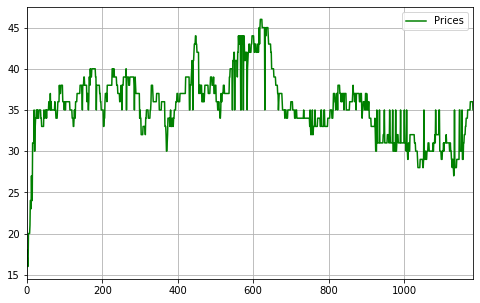

<Figure size 432x288 with 0 Axes>

In [203]:
plt.style.use('seaborn-deep')
data[['Prices']].plot(color='green', grid=True, figsize=(8,5))
plt.show()
plt.clf()

In [204]:
#Calculating total length of data to be used.
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(data)-1))

# 80% of data will be of training
train_end = int(data_to_use*0.8)

total_data = len(data)
print("total_data:", total_data)

total_data: 1185


In [205]:
start = total_data - data_to_use

# Currently doing prediction only for 1 step ahead
steps_to_predict = 1

#price compund, neg, neu, pos
# Order -> 1,2,3,4,5
price = data.iloc[start:total_data,1] #close
comp = data.iloc[start:total_data,2] #compund
neg = data.iloc[start:total_data,3] #neg
neu = data.iloc[start:total_data,4] #neu
pos = data.iloc[start:total_data,5] #pos


print("price :")
print(price.head())

price :
1    17
2    16
3    16
4    20
5    20
Name: Prices, dtype: int64


In [206]:
#shift next day close and next day compund
price_shifted = price.shift(-1) #shifted close
comp_shifted = comp.shift(-1) #shifted compund

#taking only: price, price_shifted, comp, comp_shifted
model_data = pd.concat([price, price_shifted, comp, comp_shifted], axis=1)
model_data.columns = ['price', 'price_shifted', 'comp', 'comp_shifted']

df_model = model_data.dropna()
     
print(df_model[:10])

    price  price_shifted    comp comp_shifted
1      17           16.0       0            0
2      16           16.0       0            0
3      16           20.0       0            0
4      20           20.0       0      -0.4215
5      20           20.0 -0.4215       0.4404
6      20           20.0  0.4404            0
7      20           21.0       0            0
8      21           24.0       0            0
9      24           24.0       0            0
10     24           23.0       0            0


In [207]:
df_model

,price,price_shifted,comp,comp_shifted
1,17,16.0,0,0
2,16,16.0,0,0
3,16,20.0,0,0
4,20,20.0,0,-0.4215
5,20,20.0,-0.4215,0.4404
...,...,...,...,...
1179,36,36.0,0,0.368
1180,36,36.0,0.368,0
1181,36,36.0,0,0
1182,36,35.0,0,0


In [208]:
# target variable - closed price
# after shifting
y = df_model['price_shifted'] #shifted_price

# price, comp, comp_shifted  
cols = ['price', 'comp', 'comp_shifted' ]
X = df_model[cols]

In [209]:
scaler_X = preprocessing.MinMaxScaler (feature_range=(-1, 1))
X = np.array(X).reshape((len(X) ,len(cols)))
X = scaler_X.fit_transform(X)

scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [210]:
X_train = X[0 : train_end,]
X_test = X[train_end+1 : len(X),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train. shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [211]:
batch_size = 32
nb_epoch = 100
neurons = 25
dropout = 0.1

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='hard_sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True,  activation='tanh'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))

model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

model.compile(loss='mean_squared_error' , optimizer='RMSprop')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)

C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, return_sequences=True, activation="tanh", input_shape=(3, 1), recurrent_activation="hard_sigmoid")`
  # Remove the CWD from sys.path while we load stuff.
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activity_regularizer=<keras.reg..., activation="linear", units=1)`
C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 25)             2700      
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 25)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 25)             5100      
_________________________________________________________________
dropout_11 (Dropout)         (None, 3, 25)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_12 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [212]:
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )

235/235 [==============================] - 0s 2ms/step
in train MSE =  0.0092
in test MSE =  0.013775890710409376


In [213]:
model_json = model.to_json()
with open("model_rms100e_new.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_rms100e_new.h5")
print("Saved model to disk")

Saved model to disk


Inputs: (None, 3, 1)
Outputs: (None, 1)
Actual input: (235, 3, 1)
Actual output: (235, 1)
prediction data:
[34.611885]
actual data
[[31.      0.      0.    ]
 [31.      0.      0.    ]
 [31.      0.     -0.5994]
 [31.     -0.5994  0.    ]
 [31.      0.      0.    ]
 [31.      0.     -0.128 ]
 [31.     -0.128   0.    ]
 [32.      0.      0.5106]
 [32.      0.5106  0.2023]
 [32.      0.2023  0.    ]
 [32.      0.      0.    ]
 [31.      0.      0.    ]
 [31.      0.      0.    ]
 [35.      0.     -0.3612]
 [32.     -0.3612  0.128 ]
 [31.      0.128  -0.296 ]
 [31.     -0.296   0.    ]
 [31.      0.      0.    ]
 [31.      0.      0.    ]
 [31.      0.     -0.2732]
 [31.     -0.2732  0.    ]
 [35.      0.     -0.2263]
 [30.     -0.2263 -0.3182]
 [30.     -0.3182  0.4767]
 [30.      0.4767 -0.4215]
 [31.     -0.4215  0.    ]
 [31.      0.      0.    ]
 [30.      0.      0.    ]
 [30.      0.      0.    ]
 [35.      0.      0.    ]
 [30.      0.      0.    ]
 [30.      0.      0.5222]
 [31.

C:\Python\envs\Semester 4\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


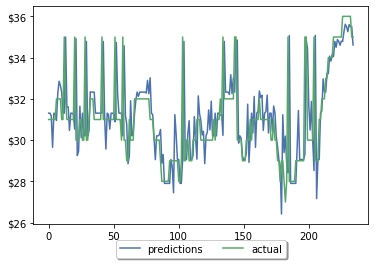

<Figure size 432x288 with 0 Axes>

In [214]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_X.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)

#########################################################################
'''Plotting'''
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.show()
plt.clf()